In [6]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

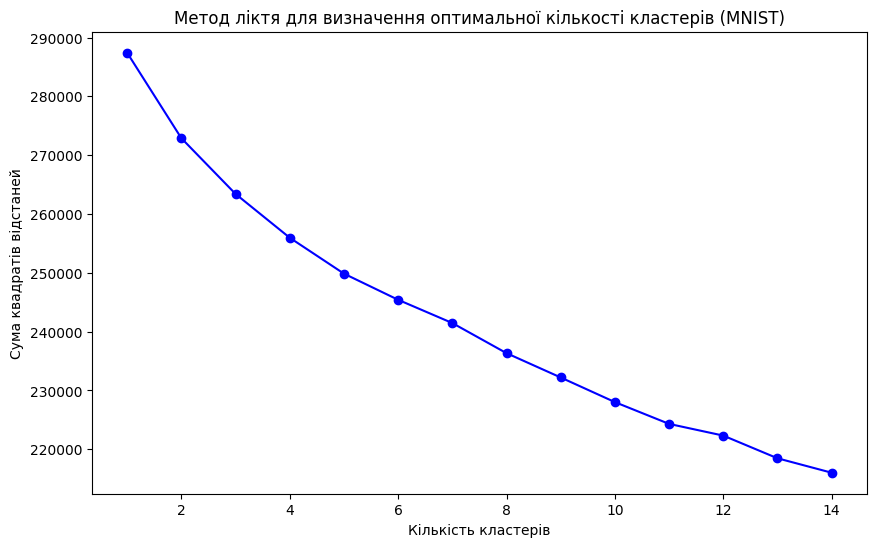

In [7]:
mnist_df = pd.read_csv("D:\Projects\Data\cluster_data\mnist.csv")

X = mnist_df

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Визначення оптимальної кількості кластерів за допомогою методу ліктя
ssd = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, ssd, 'bo-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Сума квадратів відстаней')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів (MNIST)')
plt.show()

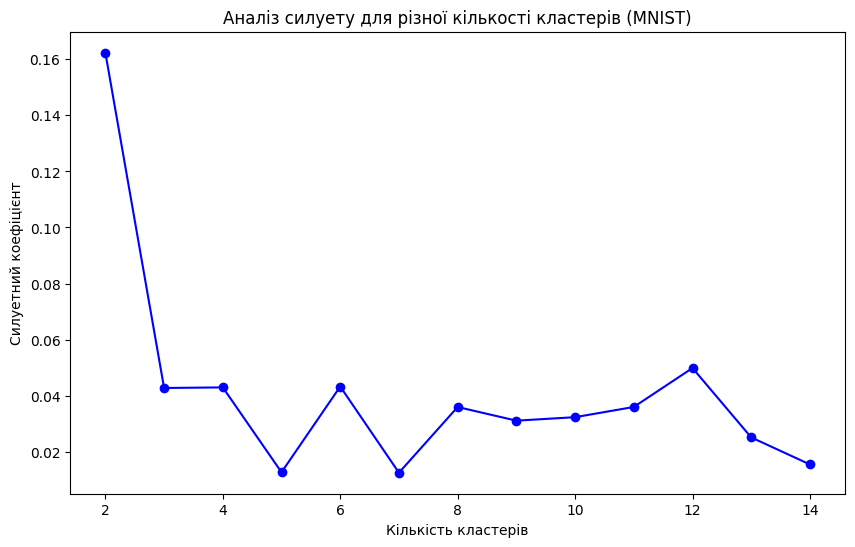

In [10]:
from sklearn.metrics import silhouette_score

# Починаємо аналіз силуету з 2 кластерів, оскільки для 1 кластера він не має сенсу
K = range(2, 15)

silhouette_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний коефіцієнт')
plt.title('Аналіз силуету для різної кількості кластерів (MNIST)')
plt.show()

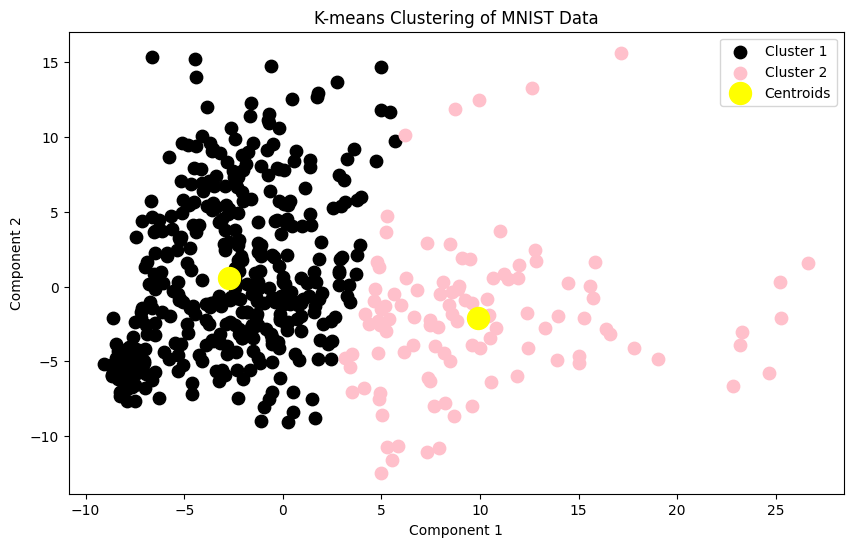

In [21]:
from sklearn.decomposition import PCA

# Зменшення розмірності
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Кластеризація
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_pca)

# Візуалізація
colors = ['black', 'pink']
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], s=80, color=colors[i], label=f'Cluster {i+1}')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=250, c='yellow', label='Centroids')

plt.title('K-means Clustering of MNIST Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

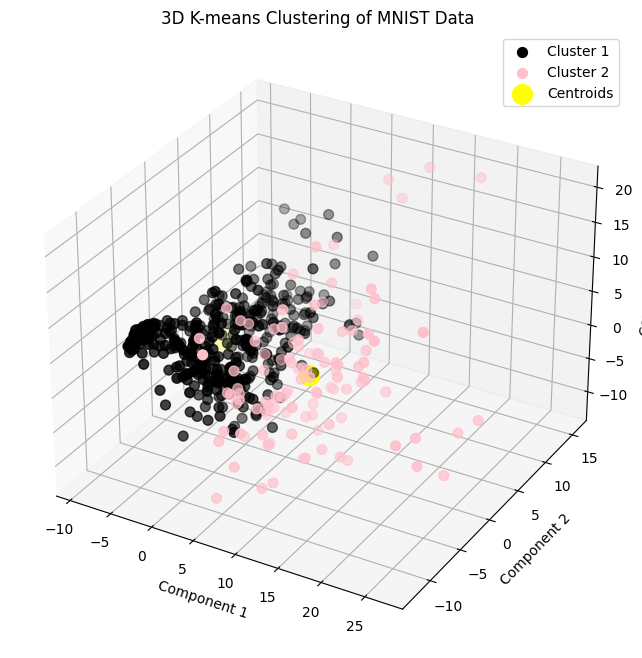

In [19]:
from mpl_toolkits.mplot3d import Axes3D  # для тривимірної візуалізації

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_pca)

# Візуалізація у тривимірному просторі
colors = ['black', 'pink']
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(n_clusters):
    ax.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], X_pca[y_kmeans == i, 2], s=50, color=colors[i], label=f'Cluster {i+1}')

centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=200, c='yellow', label='Centroids')

ax.set_title('3D K-means Clustering of MNIST Data')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend()

plt.show()